# Sales Analysis for the year 2019


## About Dataset
In this analysis I used the cleaned dataset (the original was downloaded from https://www.kaggle.com) and you can find my whole process and a better understanding of the dataset in my github profile <a href="https://github.com/GrigoriaAngelou/Sales-Analysis-Amazon-Products">here</a>

### Table of Contents
* [Import required libraries and load the dataset](#chapter1)  
* [Which month of the year has the best performance?](#chapter2)
* [Which City had the highest number of sales?](#chapter3) 
* [For each city which product sells the most?](#chapter4)
* [What time should we display adverstisement to maximize likelihood of customer's buying product?](#chapter5)
* [What product sold the most? ](#chapter6)

## Import required libraries and load the dataset <a class="anchor" id="chapter1"></a>

In [32]:
#import required libraries

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline 

The dataset contains 1642230 inputs that are individual purchases from Amazon. We have information about 19 different products, the price of those products, the city where the purchase was done, the Month, Day, Year (the year was 2019), Hour and the Total price of each buy. 

In [33]:
# import the clean dataset

df = pd.read_csv(r'C:\Users\User\Desktop\sales product\sales by month\year_sales.csv')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,City,Month,Day,Year,Hour,Total Sales
0,141234,iPhone,1,700.00,Boston,1,22,19,21:25,700.00
1,141235,Lightning Charging Cable,1,14.95,Portland,1,28,19,14:15,14.95
2,141236,Wired Headphones,2,11.99,San Francisco,1,17,19,13:33,23.98
3,141237,27in FHD Monitor,1,149.99,Los Angeles,1,5,19,20:33,149.99
4,141238,Wired Headphones,1,11.99,Austin,1,25,19,11:59,11.99


In [34]:
df.dtypes

Order ID              int64
Product              object
Quantity Ordered      int64
Price Each          float64
City                 object
Month                 int64
Day                   int64
Year                  int64
Hour                 object
Total Sales         float64
dtype: object

In [35]:
df.size

1824700

In [36]:
df['Product'].unique()

array(['iPhone', 'Lightning Charging Cable', 'Wired Headphones',
       '27in FHD Monitor', 'AAA Batteries (4-pack)',
       '27in 4K Gaming Monitor', 'USB-C Charging Cable',
       'Bose SoundSport Headphones', 'Apple Airpods Headphones',
       'Macbook Pro Laptop', 'Flatscreen TV', 'Vareebadd Phone',
       'AA Batteries (4-pack)', 'Google Phone', '20in Monitor',
       '34in Ultrawide Monitor', 'ThinkPad Laptop', 'LG Dryer',
       'LG Washing Machine'], dtype=object)

## Which month of the year has the best performance? <a class="anchor" id="chapter2"></a>

In order to answer that question, we have to group our data and sort them by Total Sales. From the results below we can observe that December (12th month) is the month which appears to have the biggest Sales, with 4557795 total earnings and the month with the worst performance is January (1st month), with 1775177 total earnings.

In [37]:
#Group the data by each month, sorted by sales

df_month = df[['Month','Total Sales']]
df_month.groupby(['Month']).sum().sort_values(by=['Total Sales'],ascending=False)['Total Sales']

Month
12    4557795.43
10    3675474.56
4     3330514.45
11    3146343.63
5     3098038.54
3     2753819.52
7     2582547.76
6     2521064.93
8     2188897.51
2     2153080.28
9     2048024.72
1     1775177.70
Name: Total Sales, dtype: float64

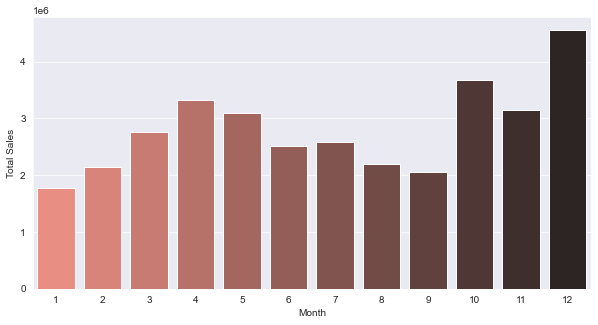

In [38]:
# plot of total sales by month

plot_df_month = df_month.groupby(['Month']).sum().sort_values(by=['Total Sales'],ascending=False)['Total Sales']
plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
sns.barplot(x=plot_df_month.index ,y= plot_df_month, palette = 'dark:salmon_r')
plt.savefig("Total Sales by Month.png", dpi=100, bbox_inches='tight')

We can dig further by searching for each month which days have better performance. Which day of the month people choose to shop.

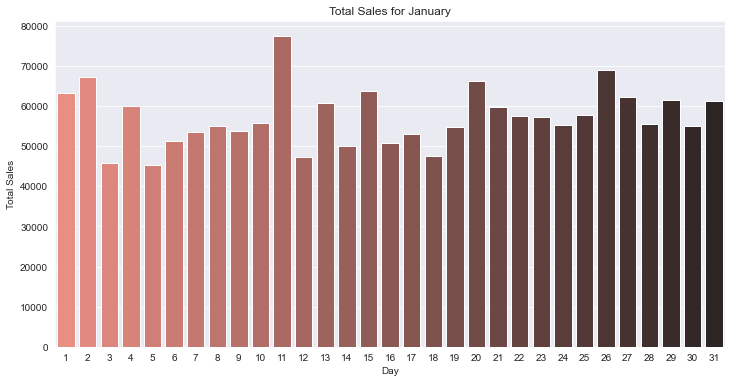

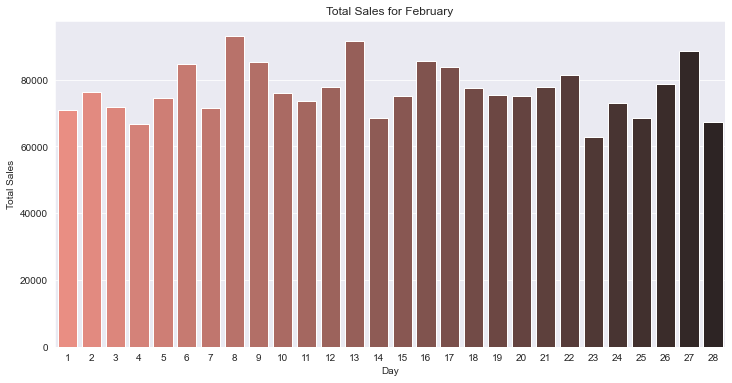

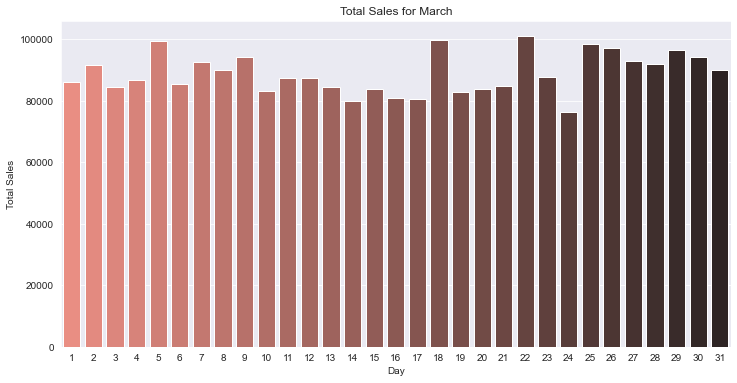

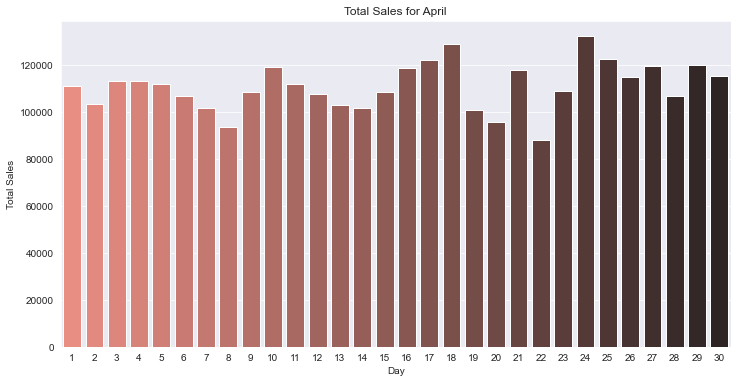

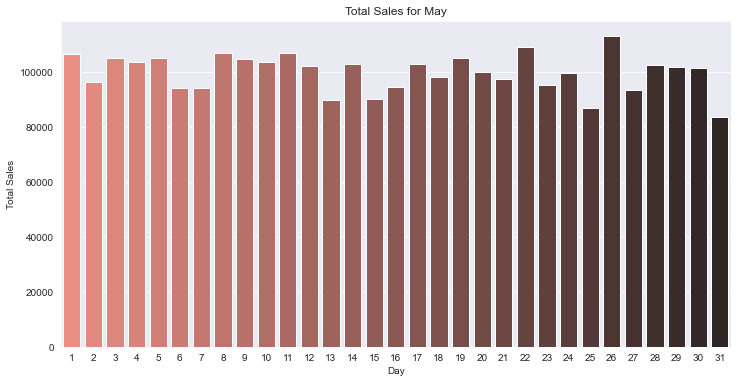

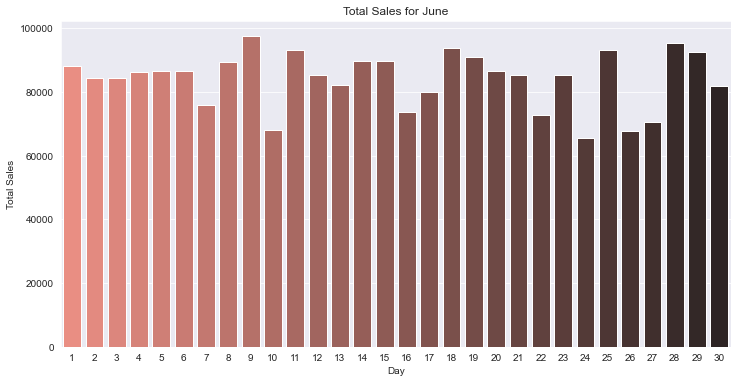

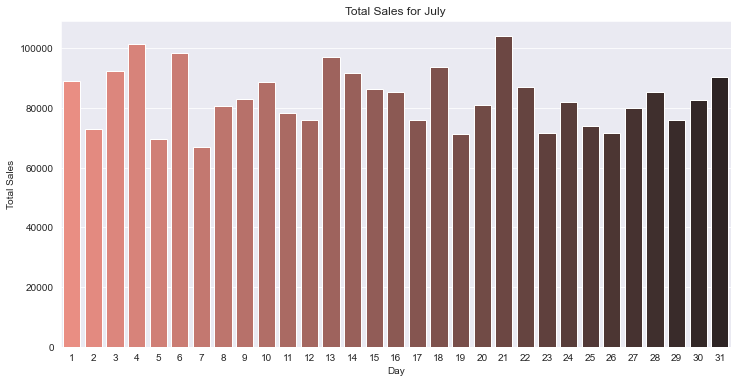

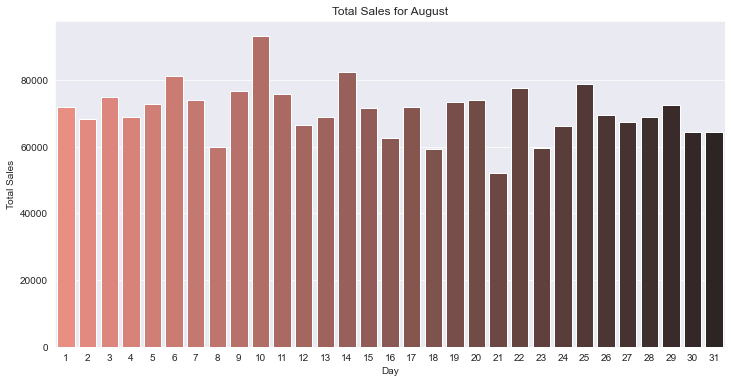

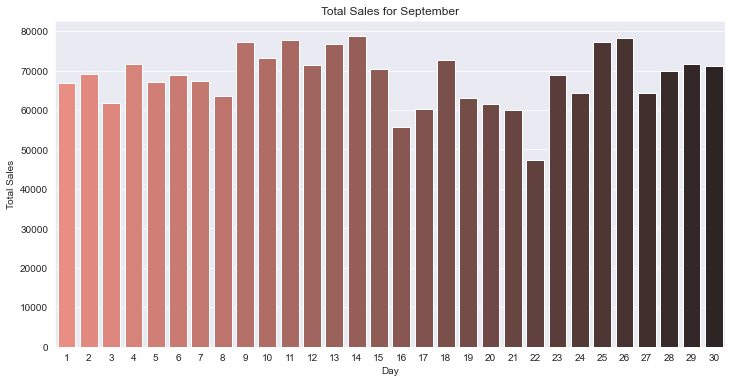

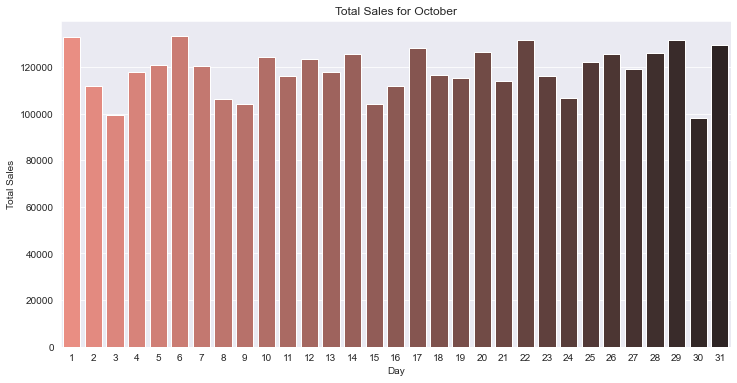

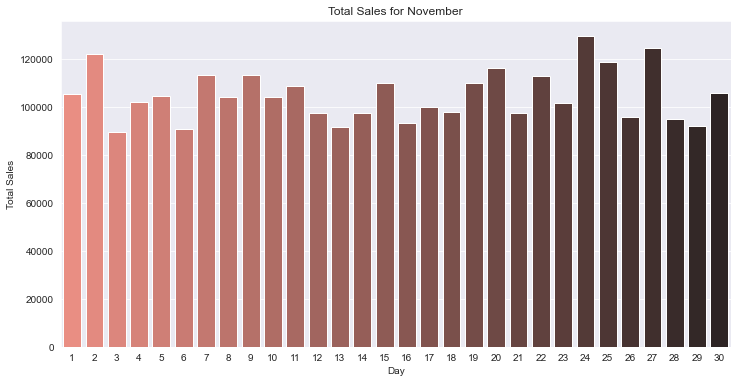

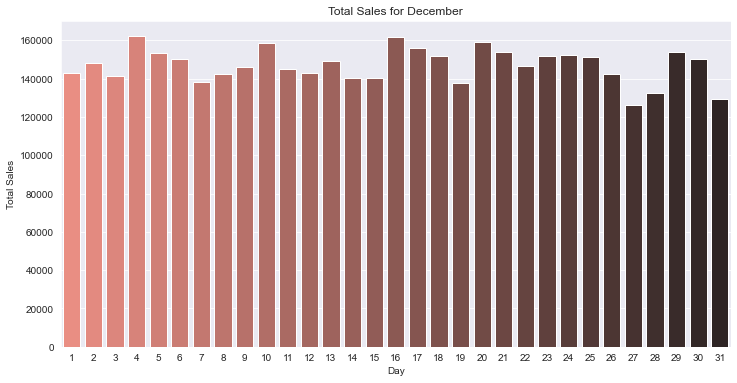

In [39]:
a = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
j=0
for i in a:
    j=j+1
    df_i = df.loc[df['Month']==j]
    plot_df_i = df_i.groupby(['Day']).sum().sort_values(by=['Total Sales'],ascending=False)['Total Sales']
    plt.figure(figsize=(12,6))
    sns.set_style('darkgrid')
    sns.barplot(x=plot_df_i.index ,y= plot_df_i, palette = 'dark:salmon_r').set(title='Total Sales for ' + str(i))

# Which City had the highest number of sales? <a class="anchor" id="chapter3"></a>

It will be interesting to see which city has the highest number of sales, in order to know where our products sell most. San Francisco has the highest performance with the number of 8111710 sales with a large difference from the second highest performance city (Los Angeles with 5345390) and Austin has the lowest with the number of 1785518 sales.

In [45]:
#Group the data by each city, sorted by sales

df_city = df[['City','Total Sales']]
df_city.groupby(['City']).sum().sort_values(['Total Sales'],ascending=False)['Total Sales']

City
San Francisco    8111710.67
Los Angeles      5345390.53
New York City    4577392.51
Boston           3599063.92
Atlanta          2739955.58
Dallas           2711795.03
Seattle          2687854.90
Portland         2272097.62
Austin           1785518.27
Name: Total Sales, dtype: float64

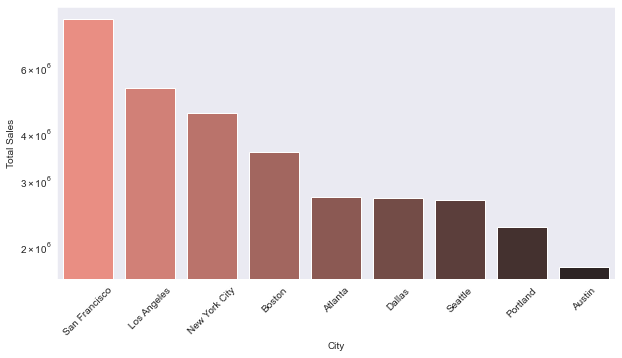

In [46]:
# plot of total sales by city

plot_df_city = df_city.groupby(['City']).sum().sort_values(['Total Sales'],ascending=False)['Total Sales']
plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
sns.barplot(x=plot_df_city.index ,y= plot_df_city, palette = 'dark:salmon_r')
plt.xticks(rotation=45)
plt.yscale('log')
plt.savefig("Total Sales by City.png", dpi=100, bbox_inches='tight')

## For each city which product sells the most? <a class="anchor" id="chapter4"></a>

We can observe that the product which makes the highest profit in every city is Macbook Pro Laptop. Especially in San Francisco where is pretty high, (1910800). So, a company that sells this kind of products, Macbook Pro Laptop is a good product to invest in a good advertisment, cause the customers seems to prefer it than other similar products. Also Iphone is a good profit too. 

In [47]:
#for each city which product sells most

df_city_product = df[['City', 'Product', 'Total Sales']]
df_city_product.groupby(['City', 'Product']).sum().sort_values(by=['Total Sales'],ascending=False)['Total Sales'].tail(40)

City           Product                 
Dallas         LG Washing Machine          28800.00
Atlanta        Lightning Charging Cable    27597.70
Dallas         Lightning Charging Cable    27418.30
Seattle        Lightning Charging Cable    26252.20
Boston         Wired Headphones            26162.18
Dallas         LG Dryer                    25800.00
Austin         20in Monitor                24857.74
San Francisco  AA Batteries (4-pack)       24679.68
Portland       Lightning Charging Cable    22604.40
Atlanta        USB-C Charging Cable        22489.90
Portland       LG Dryer                    22200.00
Seattle        USB-C Charging Cable        21904.35
San Francisco  AAA Batteries (4-pack)      21746.27
Dallas         USB-C Charging Cable        21701.20
Portland       LG Washing Machine          20400.00
Dallas         Wired Headphones            19711.56
Seattle        Wired Headphones            19363.85
Austin         Lightning Charging Cable    19016.40
Portland       USB-C Cha

In [48]:
a = df['Product'].unique()
a

array(['iPhone', 'Lightning Charging Cable', 'Wired Headphones',
       '27in FHD Monitor', 'AAA Batteries (4-pack)',
       '27in 4K Gaming Monitor', 'USB-C Charging Cable',
       'Bose SoundSport Headphones', 'Apple Airpods Headphones',
       'Macbook Pro Laptop', 'Flatscreen TV', 'Vareebadd Phone',
       'AA Batteries (4-pack)', 'Google Phone', '20in Monitor',
       '34in Ultrawide Monitor', 'ThinkPad Laptop', 'LG Dryer',
       'LG Washing Machine'], dtype=object)

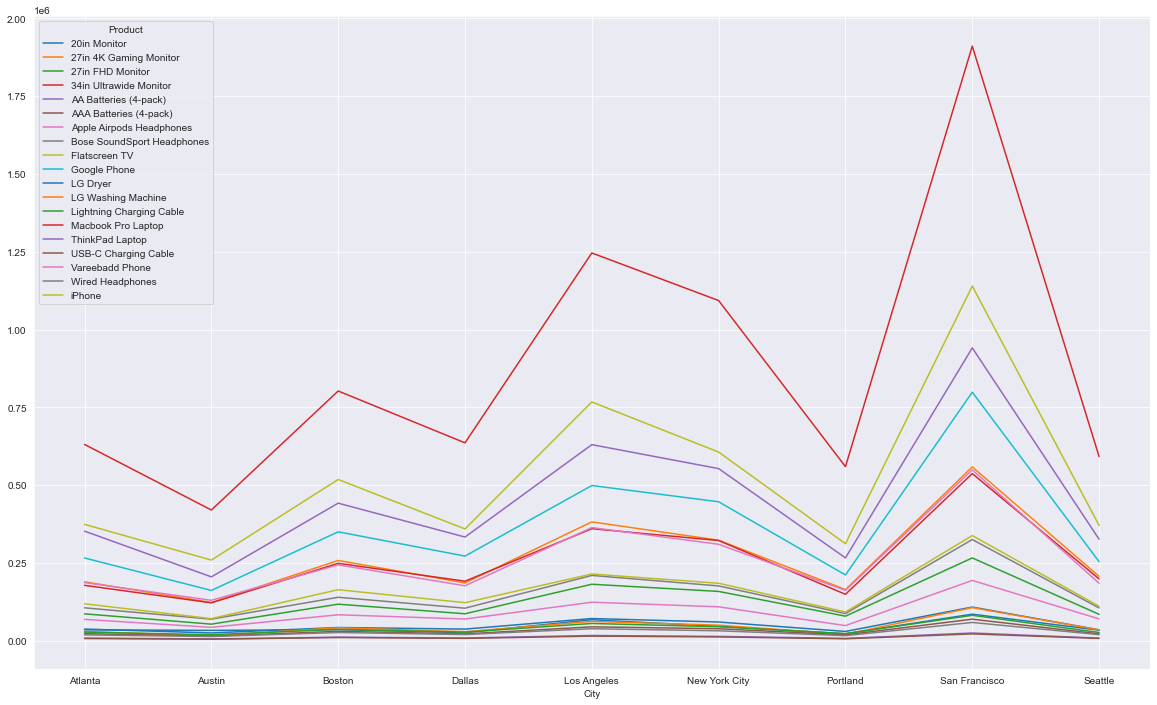

In [49]:
# plot data
fig, ax = plt.subplots(figsize=(20,12))
# use unstack()
df_city_product.groupby(['City', 'Product']).sum().sort_values(by=['Total Sales'],ascending=False)['Total Sales'].unstack().plot(ax=ax)
plt.savefig("Product Sales by City.png", dpi=100, bbox_inches='tight')

The above plot is a good way to take a look at the products all in once but there are values that are stuck together and we can not see exactly what we are looking for. So, a better way will be to use an interactive plot in order to have the ability to seperate the cities and have a better look in our values. We will make a more interactive plot with pipelines.

In [50]:
(
    df[
        (df.City.isin(['Boston', 'Portland', 'San Francisco', 'Los Angeles', 'Austin',
       'Atlanta', 'Seattle', 'New York City', 'Dallas']))
    ]
    .groupby(['Product'])['Total Sales'].sum()
    .to_frame()
    .reset_index()
    .sort_values(by='Product')
).head(1)

,Product,Total Sales
0,20in Monitor,445349.51


In [51]:
# Make DataFrame Pipeline Interactive
idf = df.interactive()


# Define Panel widgets
city = pn.widgets.ToggleGroup(
    name='City',
    options=['Boston', 'Portland', 'San Francisco', 'Los Angeles', 'Austin',
       'Atlanta', 'Seattle', 'New York City', 'Dallas'],
    value=['Boston', 'Portland', 'San Francisco', 'Los Angeles', 'Austin',
       'Atlanta', 'Seattle', 'New York City', 'Dallas'],
   )

# Combine pipeline and widgets
ipipeline = (
    idf[
            (idf.City.isin(city))
    ]
    .groupby(['Product', 'City'])['Total Sales'].sum()
    .to_frame()
    .reset_index()
    .sort_values(by='Product')  
    .reset_index(drop=True)
)

In [52]:
ihvplot = ipipeline.hvplot(x = 'Product', y='Total Sales', by='City', color=PALETTE, line_width=3, width=900, height=600)
ihvplot 
ihvplot.opts(xrotation=45)

Another way would be to present each city alone, like the example below.

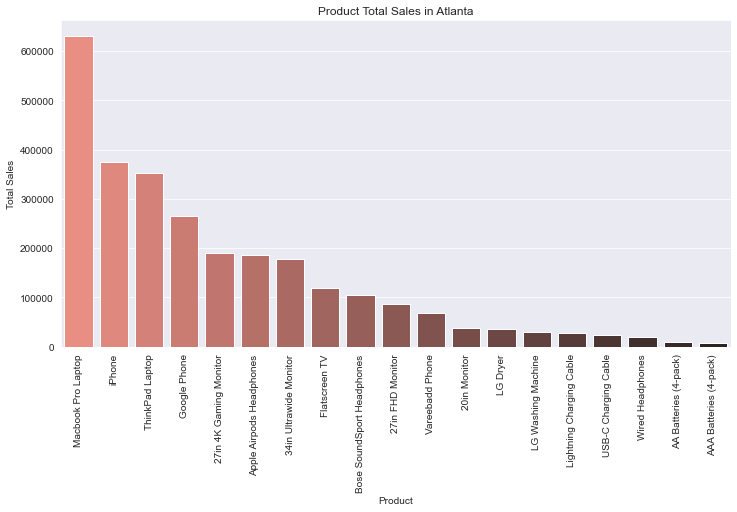

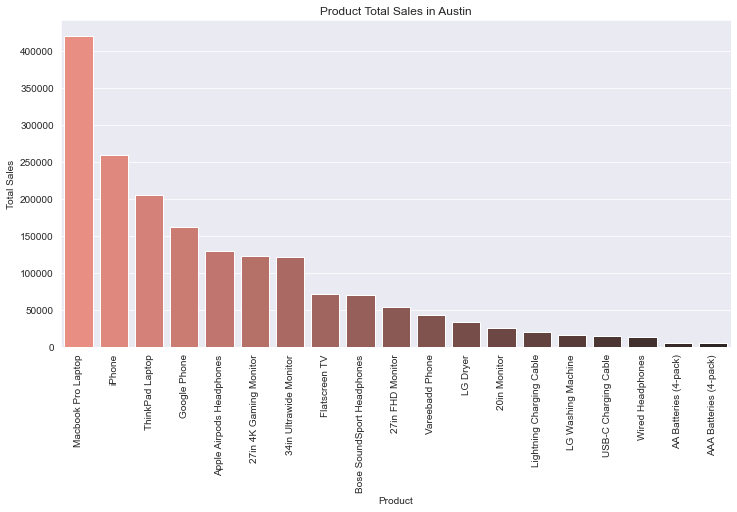

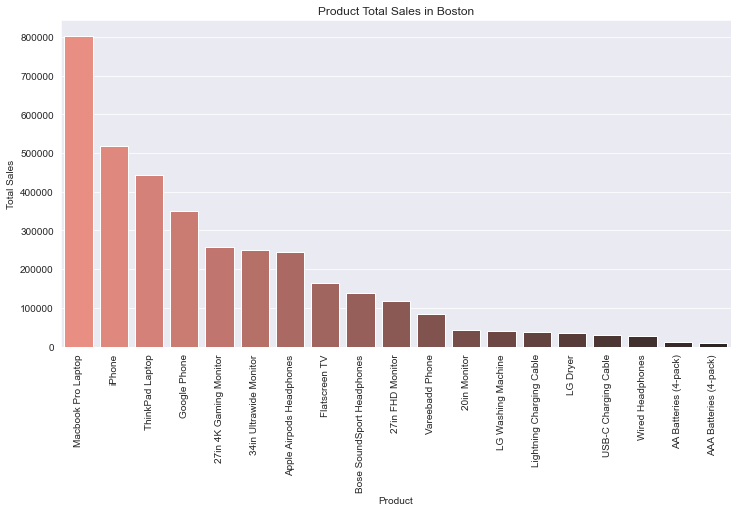

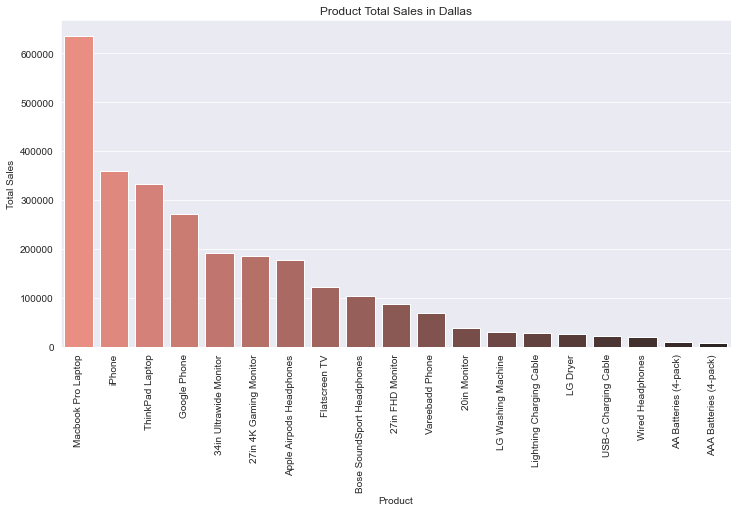

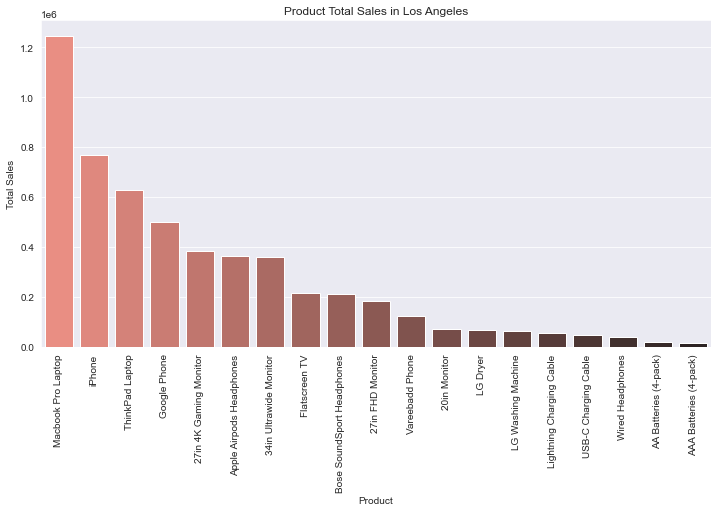

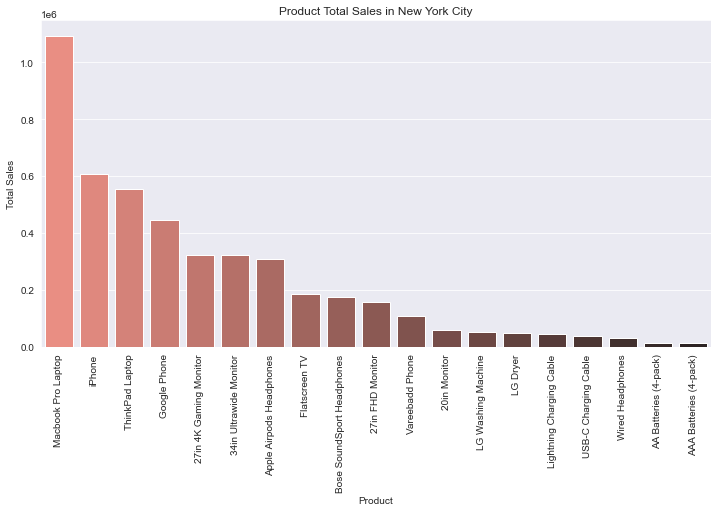

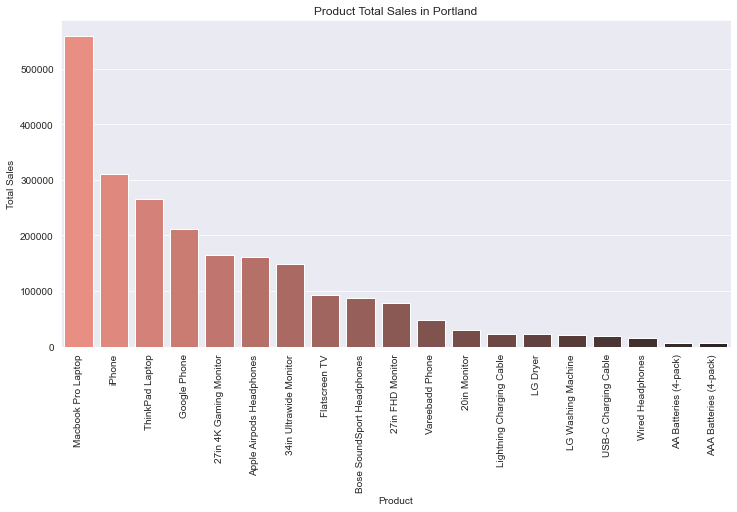

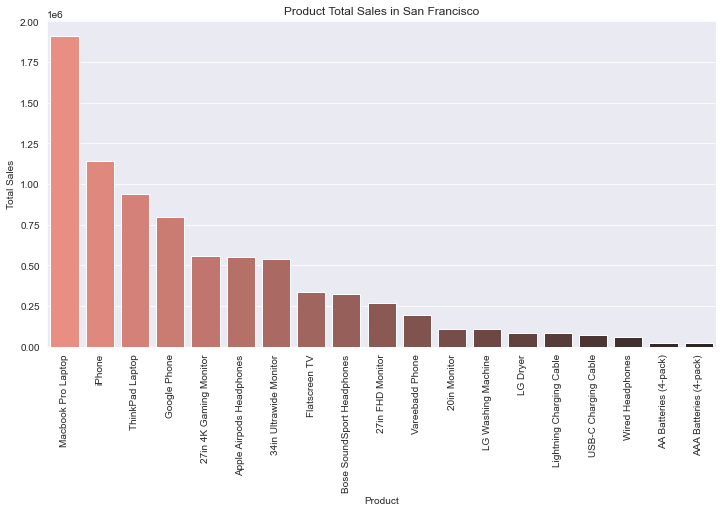

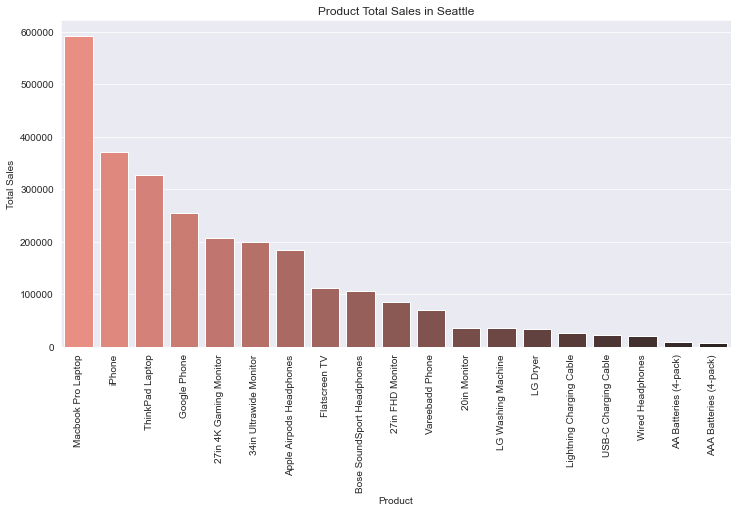

In [66]:
a = ['Atlanta', 'Austin', 'Boston', 'Dallas', 'Los Angeles', 'New York City', 'Portland', 'San Francisco', 'Seattle']
b = df['Product'].unique()
for i in a:
    j=j+1
    df_i = df.loc[df['City']==i]
    plot_df_i = df_i.groupby(['Product']).sum().sort_values(by=['Total Sales'],ascending=False)['Total Sales']
    plt.figure(figsize=(12,6))
    sns.set_style('darkgrid')
    sns.barplot(x=plot_df_i.index ,y= plot_df_i, palette = 'dark:salmon_r').set(title='Product Total Sales in ' + str(i))
    plt.xticks(rotation=90)

# What time should we display adverstisement to maximize likelihood of customer's buying product? <a class="anchor" id="chapter5"></a>

In [54]:
#split column Hour into Hour and Minutes

df[['Hour', 'Minutes']] = df['Hour'].str.split(':', expand=True)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,City,Month,Day,Year,Hour,Total Sales,Minutes
0,141234,iPhone,1,700.00,Boston,1,22,19,21,700.00,25
1,141235,Lightning Charging Cable,1,14.95,Portland,1,28,19,14,14.95,15
2,141236,Wired Headphones,2,11.99,San Francisco,1,17,19,13,23.98,33
3,141237,27in FHD Monitor,1,149.99,Los Angeles,1,5,19,20,149.99,33
4,141238,Wired Headphones,1,11.99,Austin,1,25,19,11,11.99,59


In [55]:
df_time = df[['Hour','Total Sales']]
df_time.groupby(['Hour']).sum().sort_values(['Hour'],ascending=True)['Total Sales']

Hour
00     695390.20
01     444660.17
02     230914.20
03     141901.69
04     160985.66
05     223108.79
06     441517.16
07     732897.82
08    1180875.32
09    1612106.16
10    1905962.85
11    2265347.86
12    2265385.11
13    2117310.59
14    2043952.97
15    1892542.72
16    1862349.57
17    2083010.70
18    2173302.20
19    2366376.48
20    2241367.00
21    2010710.89
22    1577115.55
23    1161687.37
Name: Total Sales, dtype: float64

In [56]:
df_time.groupby(['Hour']).sum().sort_values(['Hour'],ascending=True)['Total Sales'].max()

2366376.48

In [57]:
df_time.groupby(['Hour']).sum().sort_values(['Hour'],ascending=True)['Total Sales'].loc[df_time.groupby(['Hour']).sum().sort_values(['Hour'],ascending=True)['Total Sales'] == 2366376.48]

Hour
19    2366376.48
Name: Total Sales, dtype: float64

In [58]:
df_time.groupby(['Hour']).sum().sort_values(['Hour'],ascending=True)['Total Sales'].min()

141901.69

In [59]:
df_time.groupby(['Hour']).sum().sort_values(['Hour'],ascending=True)['Total Sales'].loc[df_time.groupby(['Hour']).sum().sort_values(['Hour'],ascending=True)['Total Sales'] == 141901.69]

Hour
03    141901.69
Name: Total Sales, dtype: float64

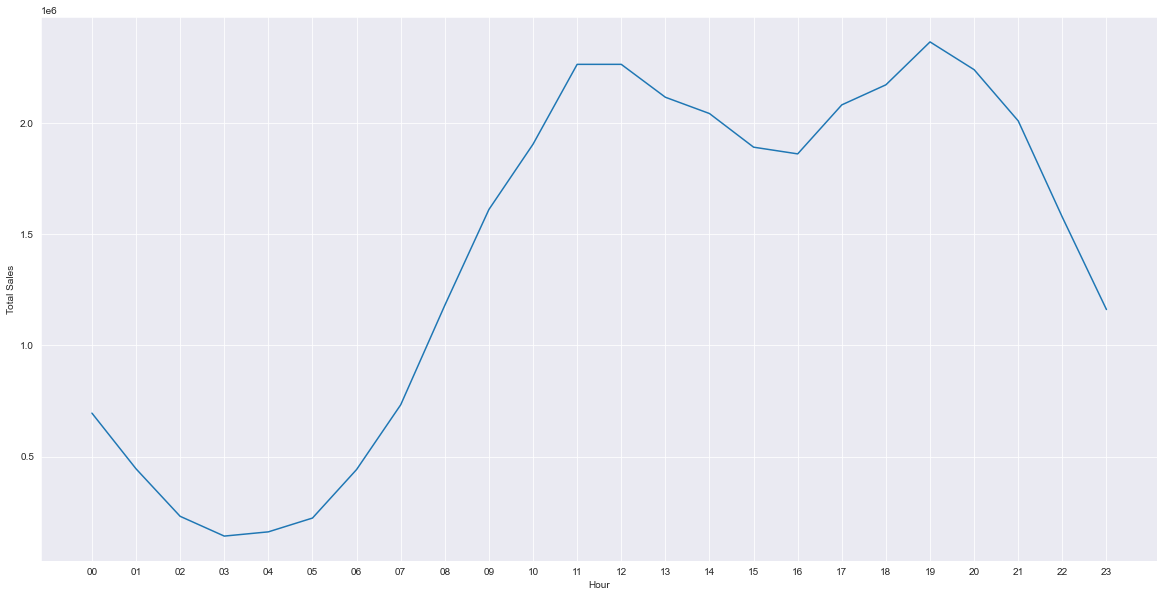

In [60]:
plot_time = df_time.groupby(['Hour']).sum().sort_values(['Hour'],ascending=True)['Total Sales']

plt.figure(figsize=(20,10))
sns.lineplot(x=plot_time.index , y=plot_time)
plt.savefig("Total Sales by Hour.png", dpi=50, bbox_inches='tight')
plt.show()

The hours that appear people prefer to buy things is 11:00 am to 12:00 pm and 07:00 pm. That's the hours that advertisements should be done mostly.

## What product sold the most?  <a class="anchor" id="chapter6"></a>

In [65]:
df_product_mostsold = df[['Product','Quantity Ordered']]
df_product_mostsold.groupby(['Product']).sum().sort_values(['Quantity Ordered'],ascending=False)['Quantity Ordered']

Product
AAA Batteries (4-pack)        30449
AA Batteries (4-pack)         27102
USB-C Charging Cable          23523
Lightning Charging Cable      22802
Wired Headphones              20173
Apple Airpods Headphones      15365
Bose SoundSport Headphones    13216
27in FHD Monitor               7413
iPhone                         6721
27in 4K Gaming Monitor         6126
34in Ultrawide Monitor         6066
Google Phone                   5429
Flatscreen TV                  4715
Macbook Pro Laptop             4641
20in Monitor                   4049
ThinkPad Laptop                4048
Vareebadd Phone                2021
LG Washing Machine              647
LG Dryer                        639
Name: Quantity Ordered, dtype: int64

The product that was sold the most was AAA Batteries (4-pack). We didn't make a lot of profit from them cause they cost so little but it was the item that was most sold (30449 individual purchases.